In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; 


from sklearn.metrics import confusion_matrix, accuracy_score
 

from keras.utils import to_categorical #to create dummy variable
from keras.utils import np_utils
from keras.models import Sequential
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D


import import_ipynb
import utils



from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


importing Jupyter notebook from utils.ipynb


In [3]:
# SOME IMPORTANT GLOBAL VARIABLE
labels = ["Bedroom","Coast","Forest","HighWay","Industrial","InsideCity","Kitchen","LivingRoom","Mountain","Office","OpenCountry","Store","Street","Suburb","TallBuilding"]
train_dir = '../images/train/'
test_dir = '../images/test/'


# CREATION OF DATA--> test and train 

As usual we, create our data

In [4]:
#LIST OF ISTRING WHICH REPRESENT ALL THE IMAGES!
list_of_images = utils.list_of_path(labels,train_dir)
train_data,train_labels = utils.read_and_process_images(list_of_images,dimension=224)
train_labels_dummy  = to_categorical(train_labels,15)

In [5]:
list_of_images_test = utils.list_of_path(labels,test_dir)
test_data,test_labels = utils.read_and_process_images(list_of_images_test,dimension=224)
test_labels_dummy  = to_categorical(test_labels,15)

#  model choice (VGG16) and feature extraction 

In [6]:
model = VGG16(weights='imagenet', include_top=False)

In [7]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [8]:
# define a function which extract feature for all my train images

def feature_extraction(dataset,pre_model):
    """
    Function which extract feature of a dataset fro the last convolutional layer of the pre_model
    
    Input dataset= path of the train images
    Input pre_model = pre-trained model for extracting feature
    
    Output  images = images of the dataset
    Output feature = feature with shape (7,7,512)
    Output feature_flatted = flattened features 
    """
    res = []
    cont = 0
    #viaggio nel dataset
    for path in dataset:
        print(cont)
        cont = cont+1
        im = load_img(path, target_size=(224, 224))
        im = img_to_array(im)
        im = np.expand_dims(im, axis=0)
        im = imagenet_utils.preprocess_input(im)
        res.append(im)
    images = np.vstack(res)
    features = pre_model.predict(images, batch_size=64)
    features_flatten = features.reshape((features.shape[0], 7 * 7 * 512))
    return images, features, features_flatten     

In [ ]:
train_images,feature_matrix,feature_array= feature_extraction(list_of_images,model)

In [10]:
test_images,feature_matrix_test,feature_array_test = feature_extraction(list_of_images_test,model)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102


In [11]:
def predict_with_linear_SVM(features_array,feature_lab,feature_array_test,test_labels,num_classes = 15):
    """
    Function which exploits linear svm to predict classes of test data 
    
    Input features_array = array with train features (flattened)
    Input feature_lab = labels of train features
    Input feature_array_test = array with test features (flattened)
    Input test_labels = labels of test features
    Input num_classes (15) = number of classes
    
    Output classif = array of svm classidicator
    Output prediction = array of prediction of test features
    Output acc = accuracy of prediction 
    """
    
    classif = [SVC(kernel="linear") for _ in range(num_classes)] # array of classifier to be trained
    # one-vs-all approach with  
    curr_label = 0
    for clf in classif:
        v = np.array([1 if label==curr_label else 0 for label in feature_lab])
        clf = clf.fit(features_array, v)
        curr_label = curr_label + 1
    # now we want to test 
    prediction = []
    for image in feature_array_test:
        pred = np.array([np.dot(clf.coef_,image) + clf.intercept_ for clf in classif])
        prediction.append(np.argmax(pred))
    prediction = np.asarray(prediction)
    #calculate accuracy
    cont=0
    for i in range(len(prediction)):
        if prediction[i]==test_labels[i]:
            cont = cont +1
        else:
            continue
        
    acc = cont/len(prediction)
    
    return classif,prediction,acc
                    
    
    

In [13]:
classifiers,prediction,accuracy = predict_with_linear_SVM(feature_array,train_labels,feature_array_test,test_labels)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [14]:
accuracy

0.8991624790619765

In [19]:
def evaluated_prediction(pred,test_lab,num_classes = 15,lab = labels):
    """
    Function which evaluate quality of prdiction of linear svm, calculating TP,FP,FN,TN
    
    Input pred = prediction 
    Input test_lab = labels
    Input num_classes(15) = number of classes
    Input lab = name of classes
    
    Output  res = dataframe with all these values
    """
    tp = []
    fp = []
    fn = []
    tn = []
    for i in range(num_classes):
        tp_temp = 0
        fp_temp = 0
        fn_temp = 0
        tn_temp = 0
        for j in range(len(pred)):
            if(pred[j]==i and test_lab[j]==i):
                tp_temp = tp_temp + 1
            if(pred[j]==i and test_lab[j]!=i):
                fp_temp = fp_temp + 1
            if(pred[j]!=i and test_lab[j]==i):
                fn_temp = fn_temp + 1
            if(pred[j]!=i and test_lab[j]!=i):
                tn_temp = tn_temp +1
        tp.append(tp_temp)
        fp.append(fp_temp)
        fn.append(fn_temp)
        tn.append(tn_temp)
    data = {'labels':labels , 'True positive':tp,'True negative':tn,'False positive':fp,'False negative':fn}
    res = pd.DataFrame(data, columns = ['labels','True positive','True negative','False positive','False negative'])
    return res

In [20]:
prova = evaluated_prediction(prediction,test_labels)

In [27]:
prova

,labels,True positive,True negative,False positive,False negative
0,Bedroom,91,2843,26,25
1,Coast,237,2695,30,23
2,Forest,220,2734,23,8
3,HighWay,151,2815,10,9
4,Industrial,169,2765,9,42
5,InsideCity,178,2761,16,30
6,Kitchen,101,2863,12,9
7,LivingRoom,147,2762,34,42
8,Mountain,256,2691,20,18
9,Office,113,2856,14,2


In [29]:
prova.loc[4]['labels']

'Industrial'

In [32]:
def build_confusion_matrix(df,pred,test_labels,lab = labels):
    """
    Function tu construct confusion matrix
    """
    num_classes = len(lab)
    cm = np.zeros((15,15))
    # insert true positive on the diagonal
    for i in range(num_classes):
        cm[i,i] = df.loc[i]['True positive']
    for i in range(num_classes): # lavoro sulle classes true
        for j in range(num_classes): #lavoro su classes predicted 
            temp = 0
            for k in range(len(test_labels)):
                if(test_labels[k]==i and pred[k]==j):
                    temp = temp +1
            cm[i,j]=temp
    return cm   
    

In [33]:
d = build_confusion_matrix(prova,prediction,test_labels)

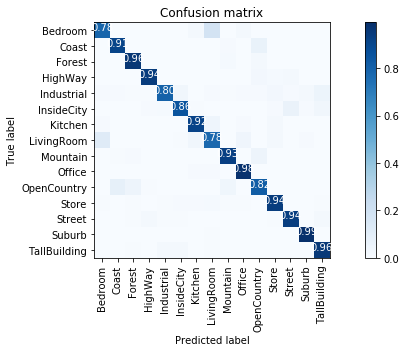

In [43]:
plt.figure(figsize=(10,5))
vvv = utils.plot_confusion_matrix(d,labels,"point_three_linear_SVM","images_point_three/",normalize=True)